# Visualize CBH Schemes

In [1]:
# import relevant rdkit 
from rdkit import Chem
from rdkit.Chem import Draw, rdChemReactions
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
from IPython.display import SVG, display
import networkx as nx

# Import CBH generator
from autocbh.CBH import buildCBH
from autocbh.calcCBH import calcCBH
from autocbh.TN import thermochemical_network, visualize

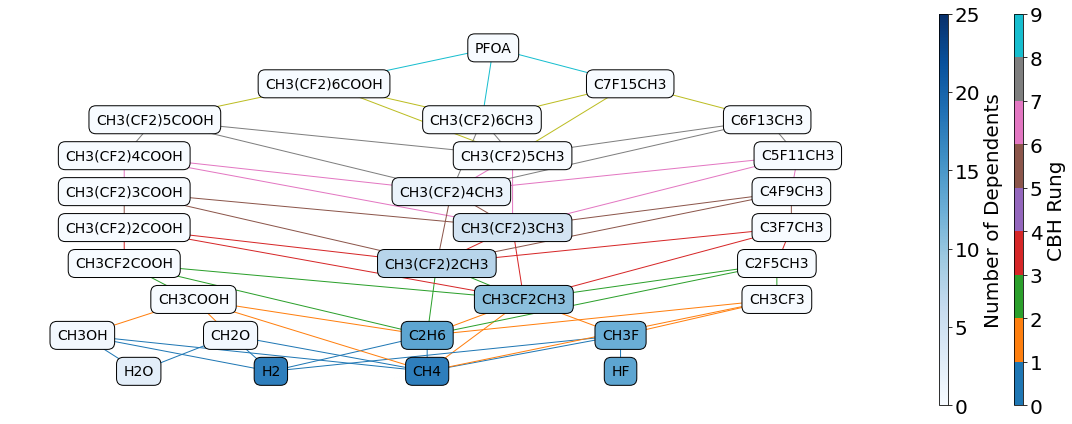

In [2]:
tn = thermochemical_network(['O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F'], 
                               saturate=1)
tn.visualize(figsize=(15,6), 
             relabel_node_mapping='../data/alias_manual_2.yaml', 
             reverse_relabel_node_mapping=True,
#              title='PFOA', 
#              dpi=200,
             label_font_size=14, 
#              save_fig_path='../figures/TN_PFOA.svg'
            )

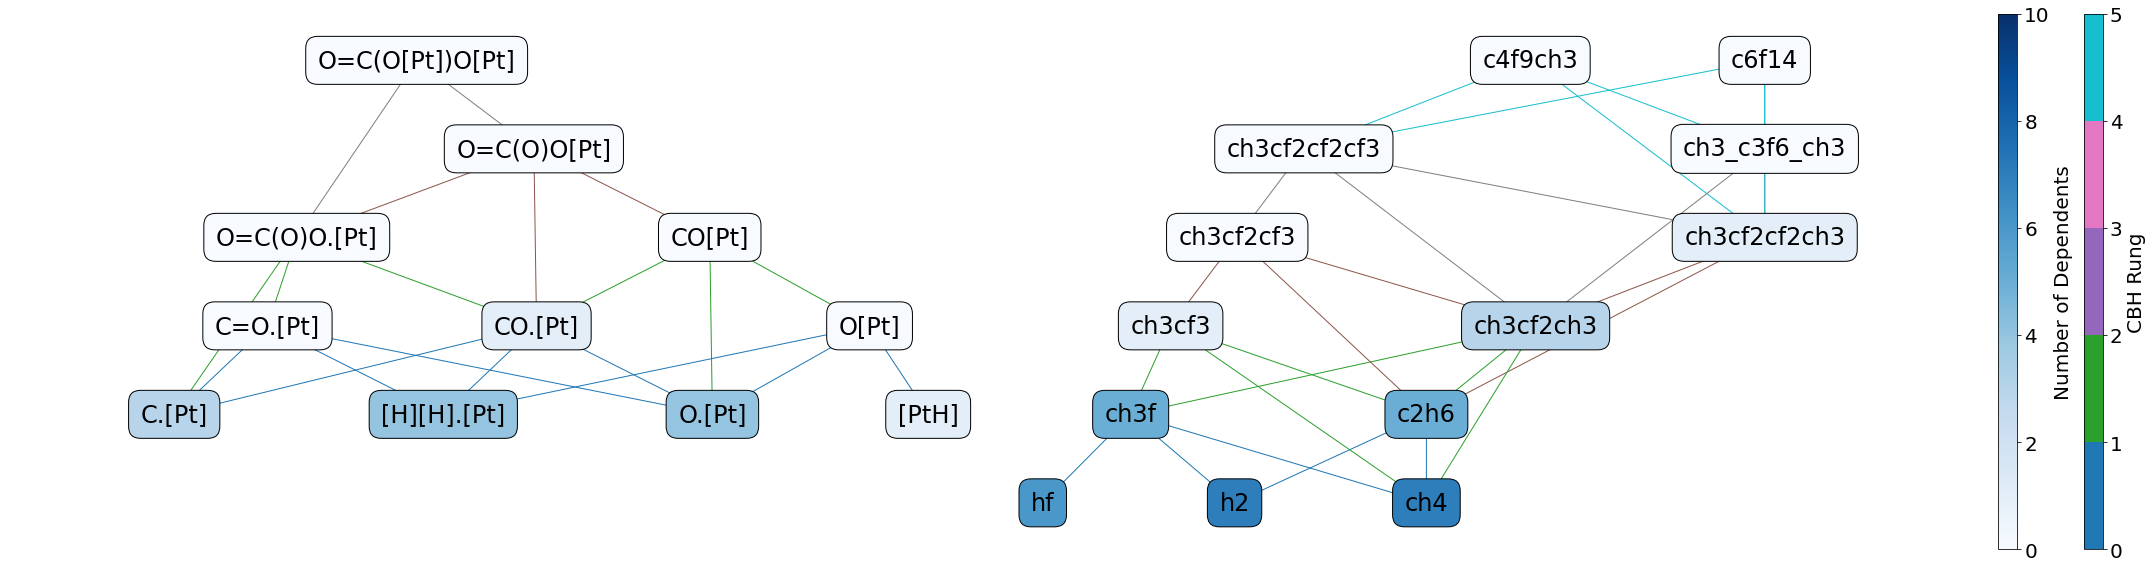

In [3]:
tn = thermochemical_network(['O=C(O[Pt])O[Pt]', 
                                'CC(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 
                                'FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F'], max_rung=4, surface_smiles='[Pt]')
tn.visualize(figsize=(30,8), 
             relabel_node_mapping='../data/alias_manual.yaml', 
             reverse_relabel_node_mapping=True, 
             label_font_size=24)

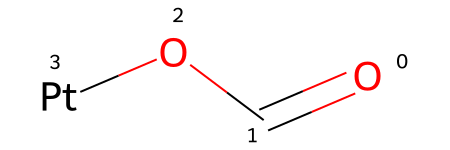

In [4]:
# Input to the CBH generator is a SMILES string.
# Visualize the molecule you will use. 
# Use the following link for getting help with this:
#     http://www.cheminfo.org/flavor/malaria/Utilities/SMILES_generator___checker/index.html

########### CHANGE THIS ############
mol = 'O=CO[Pt]'
####################################
m = Chem.MolFromSmiles(mol)
m


-----------------------------------------------------------------------------------------------------

CBH RUNG 0

Reactants:


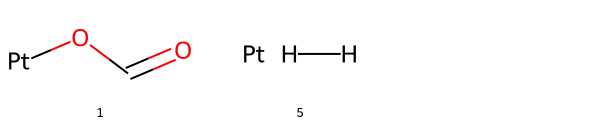


Products:


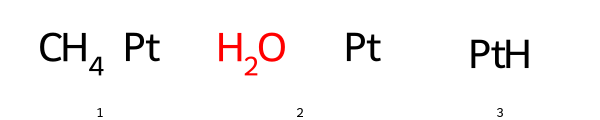


-----------------------------------------------------------------------------------------------------

CBH RUNG 1

Reactants:


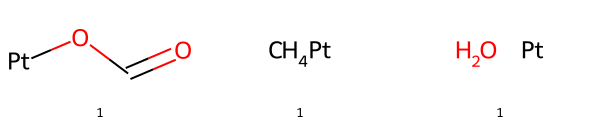


Products:


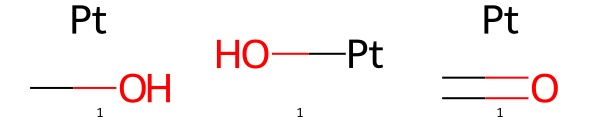


-----------------------------------------------------------------------------------------------------

CBH RUNG 2

Reactants:


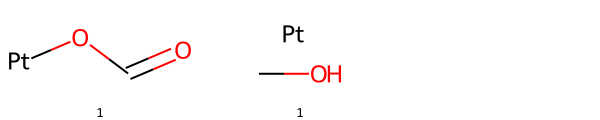


Products:


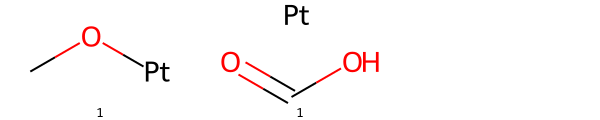

In [5]:
# Instantiate and build the CBH scheme
# This will automatically build a CBH scheme until the rung before 
# Use different saturation atoms by putting the element name in SMILES format or the atomic number
# i.e., buildCBH(mol, 9) or buildCBH(mol, 'F') will return fluorinated CBH schemes
cbh = buildCBH(mol,1, allow_overshoot=True, ignore_F2=True, surface_smiles='[Pt]')

## Visualize the reactions for each cbh_rung.
# You can specify the CBH rung or leave it empty for all
# noargs --> all
# 1 --> CBH-1
# -1 --> highest CBH rung
cbh.visualize() 